# Тесты эстиматоров взаимной информации

## Преамбула

In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-tr1zmg2a because the default path (/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
font = {'family' : 'DejaVu Sans',
        'size'   : 18}

matplotlib.rc('font', **font)

#### Импортирование модуля

In [4]:
import sys
sys.path.insert(0, './py')

In [5]:
import mutinfo.estimators.mutual_information as mi_estimators
from mutinfo.utils.dependent_norm import multivariate_normal_from_MI

In [6]:
global_n_jobs = 32

#### Стандартные тесты с произвольным преобразованием

In [7]:
def perform_normal_test(mi, n_samples, X_dimension, Y_dimension, X_map = None, Y_map = None, verbose = 0):
    # Генерация.
    random_variable = multivariate_normal_from_MI(X_dimension, Y_dimension, mi)
    X_Y = random_variable.rvs(n_samples)
    X = X_Y[:, 0:X_dimension]
    Y = X_Y[:, X_dimension:X_dimension + Y_dimension]
        
    # Применение преобразования.
    if not X_map is None:
        X = X_map(X)
           
    if not Y_map is None:
        Y = Y_map(Y)
            
    if (not X_map is None) or (not Y_map is None):
        X_Y = np.concatenate([X, Y], axis=1)

    # Оценка энтропии.
    mi_estimator = mi_estimators.MutualInfoEstimator(Y_is_discrette = False, n_jobs = global_n_jobs)
    mi_estimator.fit(X, Y, verbose = verbose)
    
    return mi_estimator.predict(X, Y, verbose = verbose)

#### График оценки взаимной информации

## Зависимость оценки от истинного значения

In [8]:
def perform_normal_test_MI(MI, n_samples, X_dimension, Y_dimension, X_map = None, Y_map = None, verbose = 0):
    """
    Вычислить оценки взаимной информации для разных истинных значений.
    """
    n_exps = len(MI)
    
    # Оценки взаимной информации.
    estimated_MI = []

    # Проведение тестов.
    for n_exp in range(n_exps):
        estimated_MI.append(perform_normal_test(MI[n_exp], n_samples, X_dimension, Y_dimension,
                                                X_map, Y_map, verbose))
        
    return estimated_MI

In [9]:
def plot_estimated_MI(MI, estimated_MI, title):
    estimated_MI_mean = np.array([estimated_MI[index][0] for index in range(len(estimated_MI))])
    estimated_MI_std  = np.array([estimated_MI[index][1] for index in range(len(estimated_MI))])
    
    fig_normal, ax_normal = plt.subplots()

    fig_normal.set_figheight(11)
    fig_normal.set_figwidth(16)

    # Сетка.
    ax_normal.grid(color='#000000', alpha=0.15, linestyle='-', linewidth=1, which='major')
    ax_normal.grid(color='#000000', alpha=0.1, linestyle='-', linewidth=0.5, which='minor')

    ax_normal.set_title(title)
    ax_normal.set_xlabel("$I(X,Y)$")
    ax_normal.set_ylabel("$\\hat I(X,Y)$")
    
    ax_normal.minorticks_on()
    
    #ax_normal.set_yscale('log')
    #ax_normal.set_xscale('log')

    ax_normal.plot(MI, MI, label="$I(X,Y)$")
    ax_normal.plot(MI, estimated_MI_mean, label="$\\hat I(X,Y)$")
    ax_normal.fill_between(MI, estimated_MI_mean + estimated_MI_std, estimated_MI_mean - estimated_MI_std, alpha=0.2)

    ax_normal.legend(loc='upper left')

    ax_normal.set_xlim((0.0, None))
    ax_normal.set_ylim((0.0, None))

    plt.show();

### Глобальные параметры тестов

In [10]:
# Исследуемые значения взаимной информации.
#MI = [0.0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0, 5.0, 7.0, 10.0]
MI = [0.0, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]
#MI = [0.0, 2.0, 5.0]
n_exps = len(MI)

# Число экземпляров и размерности векторов X и Y.
n_samples = 10000
X_dimension = 8
Y_dimension = 8

### Нормальный случайный вектор

In [11]:
# Оценки взаимной информации.
estimated_MI = perform_normal_test_MI(MI, n_samples, X_dimension, Y_dimension, verbose=10)

Настройка эстиматора для X
Поиск по сетке:  [0.38827875 0.44320791 0.50590782 0.57747777 0.65917262 0.7524247
 0.85886901]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.50590782 0.52872034 0.55256153 0.57747777 0.60351755 0.63073151
 0.65917262]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.52872034 0.53655086 0.54449735 0.55256153 0.56074514 0.56904996
 0.57747777]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.54449735 0.54717225 0.54986029 0.55256153 0.55527604 0.55800389
 0.56074514]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'algorithm': 'auto', 'atol': 0, 'bandwidth': 0.5525615301838694, 'breadth_first': True, 'kernel': 'gaussian', 'leaf_size': 40, 'metric': 'euclidean', 'metric_params': None, 'rtol': 0.001}
Настройка эстиматора для Y
Поиск по сетке:  [0.39113955 0.44609321 0.50876766 0.58024764 0.66177029 0.75474658
 0.86078568]
Fitting 5 folds for each of 7 can

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 705 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 705 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 785 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.7s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.7s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 co

[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.7s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 691 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 764 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 825 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 858 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 co

[Parallel(n_jobs=32)]: Done 670 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 825 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      |

Настройка эстиматора для X
Поиск по сетке:  [0.39040972 0.44575081 0.50893657 0.58107899 0.6634477  0.75749228
 0.8648678 ]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.50893657 0.53192961 0.55596144 0.58107899 0.60733132 0.6347697
 0.6634477 ]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.53192961 0.53982252 0.54783255 0.55596144 0.56421094 0.57258285
 0.58107899]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.54783255 0.55052889 0.55323849 0.55596144 0.55869778 0.5614476
 0.56421094]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'algorithm': 'auto', 'atol': 0, 'bandwidth': 0.5532384942310518, 'breadth_first': True, 'kernel': 'gaussian', 'leaf_size': 40, 'metric': 'euclidean', 'metric_params': None, 'rtol': 0.001}
Настройка эстиматора для Y
Поиск по сетке:  [0.38619024 0.44125858 0.50417932 0.57607217 0.6582165  0.7520741
 0.85931521]
Fitting 5 folds for each of 7 candi

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 705 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.6s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 co

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.6s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 co

[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.7s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 832 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 858 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 677 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 757 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 818 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 851 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 co

Настройка эстиматора для X
Поиск по сетке:  [0.38787355 0.4433196  0.50669159 0.57912254 0.66190739 0.75652624
 0.86467074]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.50669159 0.52976828 0.55389598 0.57912254 0.60549801 0.63307473
 0.66190739]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.52976828 0.53769175 0.54573372 0.55389598 0.56218031 0.57058854
 0.57912254]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.54573372 0.54844102 0.55116175 0.55389598 0.55664377 0.55940519
 0.56218031]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'algorithm': 'auto', 'atol': 0, 'bandwidth': 0.5538959763465698, 'breadth_first': True, 'kernel': 'gaussian', 'leaf_size': 40, 'metric': 'euclidean', 'metric_params': None, 'rtol': 0.001}
Настройка эстиматора для Y
Поиск по сетке:  [0.39191196 0.44726825 0.51044342 0.58254189 0.66482402 0.75872824
 0.86589612]
Fitting 5 folds for each of 7 ca

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 705 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 785 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.7s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 co

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.6s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 co

[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 705 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.7s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Paralle

[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 691 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 764 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 825 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 858 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.6s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      |

Настройка эстиматора для X
Поиск по сетке:  [0.3877487  0.44334611 0.50691537 0.57959951 0.66270549 0.75772763
 0.86637453]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.50691537 0.5300697  0.55428164 0.57959951 0.60607383 0.63375741
 0.66270549]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.5300697  0.53802049 0.54609054 0.55428164 0.5625956  0.57103427
 0.57959951]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.54609054 0.54880737 0.55153771 0.55428164 0.55703922 0.55981052
 0.5625956 ]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'algorithm': 'auto', 'atol': 0, 'bandwidth': 0.5515377145972817, 'breadth_first': True, 'kernel': 'gaussian', 'leaf_size': 40, 'metric': 'euclidean', 'metric_params': None, 'rtol': 0.001}
Настройка эстиматора для Y
Поиск по сетке:  [0.38808109 0.44341531 0.50663931 0.57887805 0.6614169  0.75572447
 0.86347882]
Fitting 5 folds for each of 7 ca

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 785 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 705 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.6s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 co

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 785 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 705 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.7s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 co

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 764 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 832 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 858 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

[Parallel(n_jobs=32)]: Done 729 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 818 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 865 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.3s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      |

Настройка эстиматора для X
Поиск по сетке:  [0.38879935 0.44382527 0.5066389  0.5783424  0.66019394 0.75362975
 0.86028933]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.5066389  0.52949358 0.55337924 0.5783424  0.60443165 0.6316978
 0.66019394]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.52949358 0.53733866 0.54529997 0.55337924 0.56157822 0.56989867
 0.5783424 ]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.54529997 0.54797987 0.55067294 0.55337924 0.55609885 0.55883182
 0.56157822]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'algorithm': 'auto', 'atol': 0, 'bandwidth': 0.5533792437867912, 'breadth_first': True, 'kernel': 'gaussian', 'leaf_size': 40, 'metric': 'euclidean', 'metric_params': None, 'rtol': 0.001}
Настройка эстиматора для Y
Поиск по сетке:  [0.38906304 0.4440332  0.50677002 0.57837084 0.66008803 0.75335093
 0.85979081]
Fitting 5 folds for each of 7 can

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 705 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 785 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.7s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 co

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.6s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 co

[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.7s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 670 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 750 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 825 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 865 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Paralle

[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 691 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 764 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 858 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      |

Настройка эстиматора для X
Поиск по сетке:  [0.38960238 0.44508037 0.50845821 0.58086084 0.66357334 0.75806381
 0.86600938]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.50845821 0.53152971 0.55564808 0.58086084 0.60721764 0.63477038
 0.66357334]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.53152971 0.53945055 0.54748942 0.55564808 0.56392833 0.57233197
 0.58086084]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.54748942 0.55019558 0.55291511 0.55564808 0.55839457 0.56115463
 0.56392833]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'algorithm': 'auto', 'atol': 0, 'bandwidth': 0.5529151088663723, 'breadth_first': True, 'kernel': 'gaussian', 'leaf_size': 40, 'metric': 'euclidean', 'metric_params': None, 'rtol': 0.001}
Настройка эстиматора для Y
Поиск по сетке:  [0.39059017 0.44608149 0.50945649 0.5818352  0.66449678 0.75890213
 0.8667197 ]
Fitting 5 folds for each of 7 ca

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.7s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 705 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 764 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.7s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 co

[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 785 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.6s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 691 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 750 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 818 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 865 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 649 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 701 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 769 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 865 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 886 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.4s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

Настройка эстиматора для X
Поиск по сетке:  [0.38465743 0.44025342 0.50388492 0.57671331 0.66006787 0.75546998
 0.86466091]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.50388492 0.5270772  0.55133696 0.57671331 0.60325767 0.63102377
 0.66006787]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.5270772  0.5350428  0.54312878 0.55133696 0.55966918 0.56812734
 0.57671331]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.54312878 0.54585117 0.5485872  0.55133696 0.55410049 0.55687788
 0.55966918]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'algorithm': 'auto', 'atol': 0, 'bandwidth': 0.5541004904112874, 'breadth_first': True, 'kernel': 'gaussian', 'leaf_size': 40, 'metric': 'euclidean', 'metric_params': None, 'rtol': 0.001}
Настройка эстиматора для Y
Поиск по сетке:  [0.38472168 0.43995737 0.50312342 0.57535842 0.65796443 0.75243044
 0.86045922]
Fitting 5 folds for each of 7 ca

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.6s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 785 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 785 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.6s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 co

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 691 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 764 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 832 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 865 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 co

[Parallel(n_jobs=32)]: Done 677 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 764 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      |

Настройка эстиматора для X
Поиск по сетке:  [0.38608144 0.44153068 0.50494357 0.57746386 0.66039956 0.75524653
 0.86371548]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.50494357 0.52804407 0.55220139 0.57746386 0.60388207 0.63150887
 0.66039956]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.52804407 0.53597674 0.54402858 0.55220139 0.56049696 0.56891717
 0.57746386]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.54402858 0.54673932 0.54946357 0.55220139 0.55495285 0.55771802
 0.56049696]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'algorithm': 'auto', 'atol': 0, 'bandwidth': 0.5494635659567203, 'breadth_first': True, 'kernel': 'gaussian', 'leaf_size': 40, 'metric': 'euclidean', 'metric_params': None, 'rtol': 0.001}
Настройка эстиматора для Y
Поиск по сетке:  [0.38760104 0.44283556 0.50594119 0.5780396  0.66041228 0.75452336
 0.86204561]
Fitting 5 folds for each of 7 ca

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 764 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 764 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.6s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 co

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 785 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 865 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Paralle

[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 705 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.7s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 663 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 743 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 811 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.4s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

[Parallel(n_jobs=32)]: Done 736 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 783 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 844 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 886 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      |

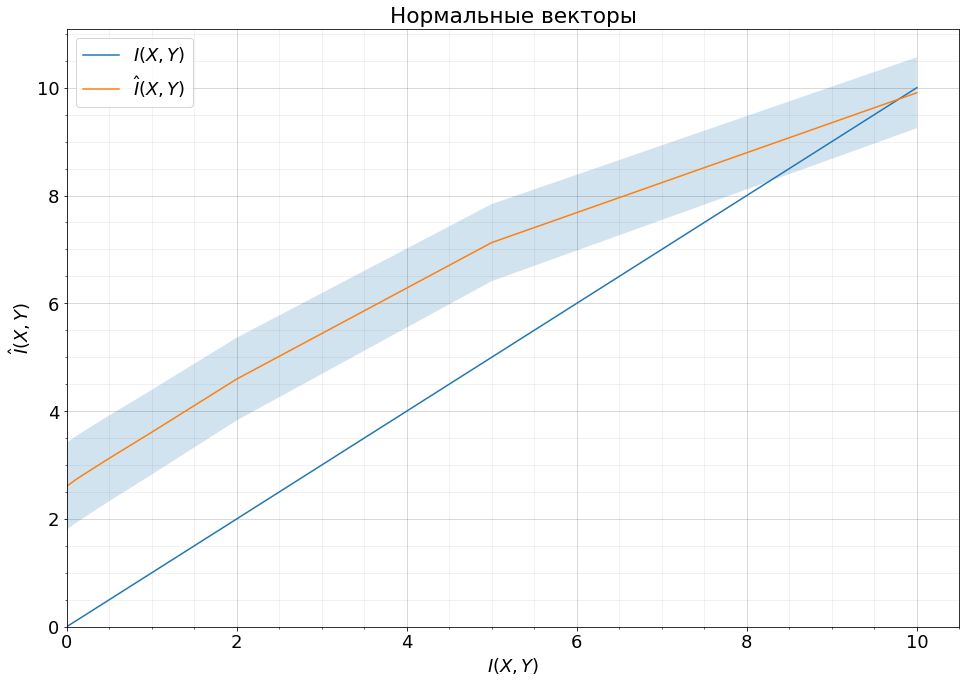

In [12]:
plot_estimated_MI(MI, estimated_MI, "Нормальные векторы")

### Равномерные распределения

Применим к компонентам нормального случайного вектора их функцию распределения.

In [13]:
from scipy.special import ndtr

In [14]:
# Оценки взаимной информации.
estimated_MI = perform_normal_test_MI(MI, n_samples, X_dimension, Y_dimension, X_map = ndtr, Y_map = ndtr,
                                      verbose=10)

Настройка эстиматора для X
Поиск по сетке:  [0.11258368 0.12830064 0.14621173 0.16662325 0.18988427 0.21639259
 0.24660153]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.11258368 0.11759619 0.12283186 0.12830064 0.13401291 0.1399795
 0.14621173]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.11759619 0.11931614 0.12106124 0.12283186 0.12462839 0.12645119
 0.12830064]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.12283186 0.12342781 0.12402664 0.12462839 0.12523305 0.12584064
 0.12645119]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'algorithm': 'auto', 'atol': 0, 'bandwidth': 0.12402664495194404, 'breadth_first': True, 'kernel': 'gaussian', 'leaf_size': 40, 'metric': 'euclidean', 'metric_params': None, 'rtol': 0.001}
Настройка эстиматора для Y
Поиск по сетке:  [0.11189854 0.12781251 0.14598974 0.16675209 0.19046722 0.21755507
 0.24849529]
Fitting 5 folds for each of 7 ca

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 705 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 764 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 832 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.4s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 co

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 705 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.3s
[Paralle

[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 764 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 858 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Paralle

[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 684 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 764 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 825 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.6s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      |

Настройка эстиматора для X
Поиск по сетке:  [0.11210252 0.12788508 0.14588961 0.16642895 0.18985995 0.21658973
 0.24708271]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.11210252 0.11713415 0.12239163 0.12788508 0.1336251  0.13962275
 0.14588961]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.11713415 0.11886106 0.12061342 0.12239163 0.12419604 0.12602706
 0.12788508]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.12239163 0.12299017 0.12359163 0.12419604 0.12480341 0.12541374
 0.12602706]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'algorithm': 'auto', 'atol': 0, 'bandwidth': 0.12359163426029637, 'breadth_first': True, 'kernel': 'gaussian', 'leaf_size': 40, 'metric': 'euclidean', 'metric_params': None, 'rtol': 0.001}
Настройка эстиматора для Y
Поиск по сетке:  [0.11263462 0.12848648 0.14656928 0.16719701 0.19072781 0.21757028
 0.24819047]
Fitting 5 folds for each of 7 c

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 764 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.4s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 705 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.3s
[Paralle

[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 705 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.3s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 684 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 764 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.4s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 co

[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 656 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 708 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 783 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 837 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      |

Настройка эстиматора для X
Поиск по сетке:  [0.11235872 0.12827646 0.14644926 0.16719658 0.19088316 0.21792539
 0.24879866]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.11235872 0.1174321  0.12273457 0.12827646 0.13406859 0.14012226
 0.14644926]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.1174321  0.11917364 0.120941   0.12273457 0.12455474 0.12640191
 0.12827646]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.12273457 0.12333832 0.12394504 0.12455474 0.12516744 0.12578316
 0.12640191]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'algorithm': 'auto', 'atol': 0, 'bandwidth': 0.12394503795460395, 'breadth_first': True, 'kernel': 'gaussian', 'leaf_size': 40, 'metric': 'euclidean', 'metric_params': None, 'rtol': 0.001}
Настройка эстиматора для Y
Поиск по сетке:  [0.11182955 0.12765675 0.14572396 0.16634822 0.18989142 0.21676668
 0.24744559]
Fitting 5 folds for each of 7 c

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 684 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 764 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 705 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 785 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 691 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.3s
[Paralle

[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 832 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.4s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 677 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 750 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 818 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 858 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Paralle

[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 764 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 858 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.6s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      |

Настройка эстиматора для X
Поиск по сетке:  [0.11209569 0.12808858 0.14636321 0.1672451  0.19110626 0.21837172
 0.2495272 ]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.11209569 0.11719149 0.12251895 0.12808858 0.13391141 0.13999894
 0.14636321]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.11719149 0.11894106 0.12071675 0.12251895 0.12434805 0.12620446
 0.12808858]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.12071675 0.12131452 0.12191524 0.12251895 0.12312564 0.12373533
 0.12434805]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'algorithm': 'auto', 'atol': 0, 'bandwidth': 0.12312563741961263, 'breadth_first': True, 'kernel': 'gaussian', 'leaf_size': 40, 'metric': 'euclidean', 'metric_params': None, 'rtol': 0.001}
Настройка эстиматора для Y
Поиск по сетке:  [0.11256228 0.12853505 0.14677438 0.16760191 0.1913849  0.21854273
 0.2495543 ]
Fitting 5 folds for each of 7 c

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 691 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 705 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 785 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 705 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 co

[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.4s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 677 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 736 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 804 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 858 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.2s
[Paralle

[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 670 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 729 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 797 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 865 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 128 tasks      |

Настройка эстиматора для X
Поиск по сетке:  [0.11224307 0.12813058 0.14626691 0.16697035 0.19060427 0.21758347
 0.24838146]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.11224307 0.11730701 0.12259941 0.12813058 0.1339113  0.13995282
 0.14626691]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.11730701 0.11904526 0.12080926 0.12259941 0.12441608 0.12625967
 0.12813058]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.12259941 0.123202   0.12380755 0.12441608 0.1250276  0.12564213
 0.12625967]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'algorithm': 'auto', 'atol': 0, 'bandwidth': 0.12380755224766828, 'breadth_first': True, 'kernel': 'gaussian', 'leaf_size': 40, 'metric': 'euclidean', 'metric_params': None, 'rtol': 0.001}
Настройка эстиматора для Y
Поиск по сетке:  [0.11241129 0.12826429 0.14635298 0.16699265 0.19054308 0.21741474
 0.24807602]
Fitting 5 folds for each of 7 c

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 705 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 832 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.4s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.3s
[Paralle

[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 757 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.4s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 691 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 736 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 818 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 858 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 886 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Paralle

[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 691 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 757 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 832 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 865 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      |

Настройка эстиматора для X
Поиск по сетке:  [0.1125619  0.12852141 0.14674372 0.16754966 0.19130557 0.21842968
 0.24939957]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.1125619  0.11764842 0.12296479 0.12852141 0.13432911 0.14039926
 0.14674372]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.11764842 0.1193945  0.1211665  0.12296479 0.12478978 0.12664185
 0.12852141]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.1211665  0.12176299 0.12236242 0.12296479 0.12357014 0.12417846
 0.12478978]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'algorithm': 'auto', 'atol': 0, 'bandwidth': 0.1229647942981319, 'breadth_first': True, 'kernel': 'gaussian', 'leaf_size': 40, 'metric': 'euclidean', 'metric_params': None, 'rtol': 0.001}
Настройка эстиматора для Y
Поиск по сетке:  [0.11169314 0.12763095 0.14584297 0.16665371 0.190434   0.21760756
 0.2486586 ]
Fitting 5 folds for each of 7 ca

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 764 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.4s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.3s
[Paralle

[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 705 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.4s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 670 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 743 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 832 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

[Parallel(n_jobs=32)]: Done 797 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 851 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 886 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.3s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      |

Настройка эстиматора для X
Поиск по сетке:  [0.11192122 0.12778219 0.14589091 0.16656591 0.19017088 0.21712104
 0.24789046]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.11192122 0.11697644 0.12226    0.12778219 0.13355382 0.13958613
 0.14589091]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.11697644 0.11871176 0.12047281 0.12226    0.12407369 0.12591429
 0.12778219]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.12226    0.12286159 0.12346615 0.12407369 0.12468421 0.12529774
 0.12591429]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'algorithm': 'auto', 'atol': 0, 'bandwidth': 0.12346615461004101, 'breadth_first': True, 'kernel': 'gaussian', 'leaf_size': 40, 'metric': 'euclidean', 'metric_params': None, 'rtol': 0.001}
Настройка эстиматора для Y
Поиск по сетке:  [0.11229137 0.12828344 0.14655303 0.16742451 0.19126841 0.21850807
 0.24962708]
Fitting 5 folds for each of 7 c

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 764 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 832 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 764 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.3s
[Paralle

[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 684 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 764 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 832 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.4s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 684 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 757 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 832 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 865 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 705 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.6s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 232 tasks      |

Настройка эстиматора для X
Поиск по сетке:  [0.11232165 0.12822927 0.14638981 0.16712236 0.19079116 0.21781207
 0.24865983]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.11232165 0.11739187 0.12269097 0.12822927 0.13401757 0.14006715
 0.14638981]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.11739187 0.11913231 0.12089854 0.12269097 0.12450997 0.12635593
 0.12822927]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.12269097 0.12329433 0.12390066 0.12450997 0.12512227 0.12573759
 0.12635593]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'algorithm': 'auto', 'atol': 0, 'bandwidth': 0.12390065689413018, 'breadth_first': True, 'kernel': 'gaussian', 'leaf_size': 40, 'metric': 'euclidean', 'metric_params': None, 'rtol': 0.001}
Настройка эстиматора для Y
Поиск по сетке:  [0.11168985 0.12759044 0.14575469 0.16650488 0.19020914 0.21728803
 0.24822197]
Fitting 5 folds for each of 7 c

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 705 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 865 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.4s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 684 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.3s
[Paralle

[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.4s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 677 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 743 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 865 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Paralle

[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 670 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 750 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 832 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 865 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 886 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.4s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      |

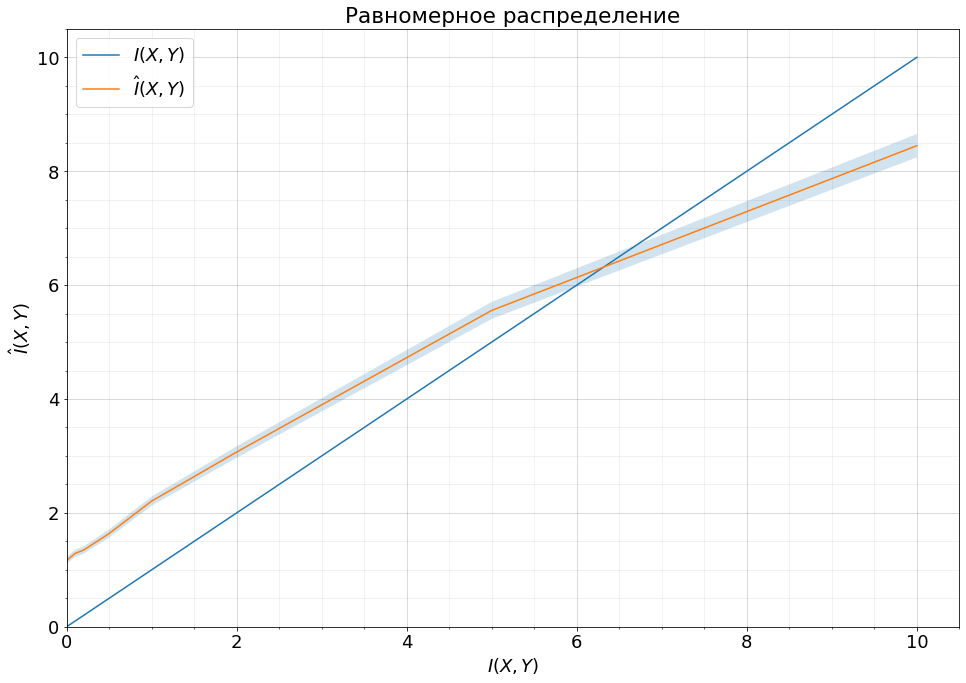

In [15]:
plot_estimated_MI(MI, estimated_MI, "Равномерное распределение")

### Кольца

Получим равномерные распределения согласно предыдущему пункту. Далее применим следующее преобразование:

$$
\begin{cases}
x' = [R \cdot x + r \cdot (1 - x)] \cdot \cos(2 \pi y) \\
y' = [R \cdot x + r \cdot (1 - x)] \cdot \sin(2 \pi y) \\
\end{cases}
$$

Здесь требуется размерность $ 2 $ у обоих векторов.

In [16]:
r = 1.0
R = 2.0

def ring_mapping(X):
    """
    Нормальный вектор в кольцо.
    """
    
    assert len(X.shape) == 2
    assert X.shape[1] == 2
    
    X = ndtr(X)
    new_X = np.zeros_like(X)
    for index in range(X.shape[0]):
        rho = R * X[index][0] + r * (1.0 - X[index][0])
        phi = 2.0 * np.pi * X[index][1]
        
        new_X[index][0] = rho * np.cos(phi)
        new_X[index][1] = rho * np.sin(phi)
    
    return new_X

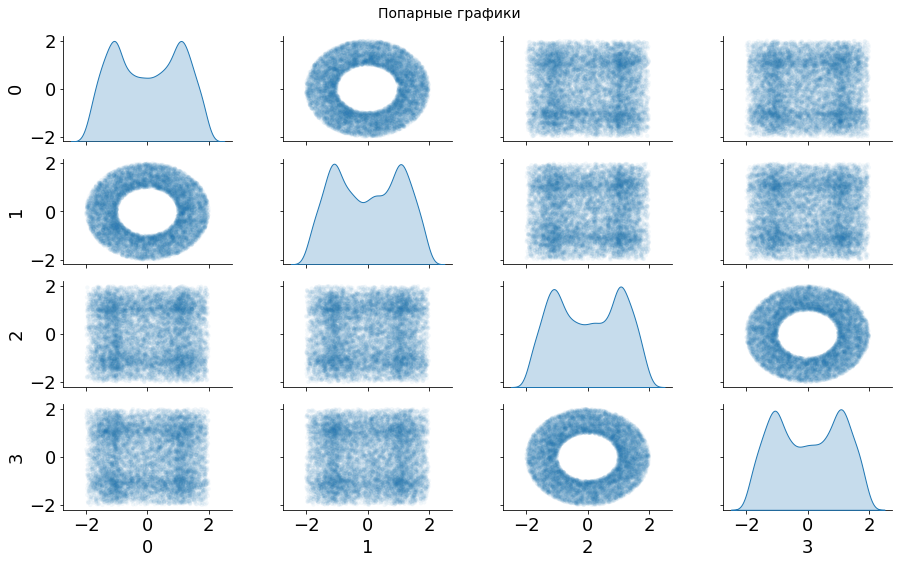

In [17]:
def _rings_pp():
    _X_Y = multivariate_normal_from_MI(X_dimension, Y_dimension, mutual_information=10.0).rvs(10000)
    _X = _X_Y[:, 0:2]
    _Y = _X_Y[:, 2:4]
    _X = ring_mapping(_X)
    _Y = ring_mapping(_Y)
    _X_Y = np.concatenate([_X, _Y], axis=1)

    pp = sns.pairplot(pd.DataFrame(_X_Y), height = 2.0, aspect=1.6,
                      plot_kws=dict(edgecolor="k", linewidth=0.0, alpha=0.05, size=0.01, s=0.01),
                      diag_kind="kde", diag_kws=dict(shade=True))

    fig = pp.fig
    fig.subplots_adjust(top=0.93, wspace=0.3)
    t = fig.suptitle("Попарные графики", fontsize=14)
    
_rings_pp()

In [18]:
# Оценки взаимной информации.
estimated_MI = perform_normal_test_MI(MI, n_samples, 2, 2, X_map = ring_mapping, Y_map = ring_mapping, verbose=10)

Настройка эстиматора для X
Поиск по сетке:  [0.21387236 0.24287046 0.2758003  0.31319497 0.35565983 0.40388233
 0.45864313]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.09973197 0.11567987 0.13417796 0.15563403 0.18052108 0.20938777
 0.24287046]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04095379 0.04869168 0.05789157 0.06882971 0.08183453 0.09729649
 0.11567987]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04095379 0.04338581 0.04596224 0.04869168 0.0515832  0.05464643
 0.05789157]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04338581 0.04422816 0.04508686 0.04596224 0.04685462 0.04776432
 0.04869168]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04508686 0.04537679 0.04566858 0.04596224 0.0462578  0.04655525
 0.04685462]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04566858 0.

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 792 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 792 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.1s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 792 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.0s
[Paralle

[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 799 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.1s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 785 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Paralle

[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 785 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

Настройка эстиматора для X
Поиск по сетке:  [0.21416997 0.24309186 0.2759194  0.31318004 0.35547241 0.40347602
 0.45796212]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.10015845 0.11610958 0.13460108 0.15603751 0.18088788 0.2096959
 0.24309186]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04126718 0.04903227 0.05825849 0.06922077 0.08224578 0.09772166
 0.11610958]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04126718 0.04370829 0.04629381 0.04903227 0.05193272 0.05500474
 0.05825849]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04629381 0.0471892  0.04810191 0.04903227 0.04998063 0.05094732
 0.05193272]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04903227 0.04934637 0.04966249 0.04998063 0.0503008  0.05062303
 0.05094732]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04966249 0.0

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 792 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 792 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.1s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 792 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.0s
[Paralle

[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 792 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.1s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 792 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.3s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      |

Настройка эстиматора для X
Поиск по сетке:  [0.21509232 0.24388743 0.27653743 0.31355839 0.35553547 0.40313215
 0.45710076]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.10121336 0.11719159 0.13569225 0.15711355 0.18191656 0.21063514
 0.24388743]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04200358 0.04983732 0.05913206 0.07016029 0.0832453  0.09877069
 0.11719159]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04200358 0.04446747 0.04707589 0.04983732 0.05276073 0.05585562
 0.05913206]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04707589 0.04797893 0.0488993  0.04983732 0.05079333 0.05176768
 0.05276073]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04797893 0.04828378 0.04859056 0.0488993  0.04920999 0.04952266
 0.04983732]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04859056 0.

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 792 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 792 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.1s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 792 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.1s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.1s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Paralle

[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      |

Настройка эстиматора для X
Поиск по сетке:  [0.21446002 0.24332503 0.2760751  0.31323313 0.35539241 0.40322606
 0.45749784]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.10053184 0.1164888  0.13497853 0.15640305 0.18122818 0.2099937
 0.24332503]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.0415356  0.0493247  0.05857447 0.06955884 0.08260309 0.0980935
 0.1164888 ]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.0415356  0.04398472 0.04657824 0.0493247  0.05223309 0.05531298
 0.05857447]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04398472 0.04483277 0.04569717 0.04657824 0.0474763  0.04839168
 0.0493247 ]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04569717 0.045989   0.04628268 0.04657824 0.04687569 0.04717504
 0.0474763 ]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04628268 0.04

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 792 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 799 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 785 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Paralle

[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 785 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.1s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 792 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.2s
[Paralle

[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 813 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.1s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      |

Настройка эстиматора для X
Поиск по сетке:  [0.21383133 0.24244692 0.27489194 0.31167886 0.35338872 0.40068032
 0.45430065]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.10064664 0.11652941 0.13491858 0.15620969 0.1808607  0.20940181
 0.24244692]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.0417813  0.0495706  0.05881207 0.06977643 0.08278488 0.09821849
 0.11652941]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.0417813  0.04423126 0.04682489 0.0495706  0.05247732 0.05555447
 0.05881207]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04423126 0.04507944 0.04594388 0.04682489 0.0477228  0.04863793
 0.0495706 ]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04594388 0.04623569 0.04652936 0.04682489 0.0471223  0.0474216
 0.0477228 ]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04682489 0.0

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 799 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 799 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 799 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.0s
[Paralle

[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 799 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.1s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 785 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 785 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

Настройка эстиматора для X
Поиск по сетке:  [0.21374493 0.24255633 0.27525131 0.31235336 0.35445652 0.4022349
 0.4564535 ]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.10009102 0.11600179 0.13444179 0.15581306 0.18058158 0.20928737
 0.24255633]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04130262 0.04905976 0.05827379 0.06921833 0.08221839 0.09766003
 0.11600179]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04130262 0.04374149 0.04632437 0.04905976 0.05195668 0.05502466
 0.05827379]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04632437 0.04721879 0.04813047 0.04905976 0.050007   0.05097252
 0.05195668]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04721879 0.04752075 0.04782464 0.04813047 0.04843826 0.04874802
 0.04905976]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04813047 0.0

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 806 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 785 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.1s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 799 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Paralle

[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 792 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.1s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      |

Настройка эстиматора для X
Поиск по сетке:  [0.21447422 0.24340751 0.27624399 0.31351023 0.35580381 0.40380293
 0.45827729]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.10037415 0.11634308 0.13485257 0.15630682 0.1811743  0.20999806
 0.24340751]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04139137 0.04917166 0.05841441 0.06939452 0.08243854 0.09793443
 0.11634308]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04139137 0.0438374  0.04642799 0.04917166 0.05207748 0.05515501
 0.05841441]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.0438374  0.04468446 0.04554788 0.04642799 0.0473251  0.04823955
 0.04917166]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04642799 0.04672512 0.04702415 0.0473251  0.04762797 0.04793278
 0.04823955]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04702415 0.

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 785 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 799 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 799 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.0s
[Paralle

[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 799 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 232 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 792 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 792 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.3s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

Настройка эстиматора для X
Поиск по сетке:  [0.21346089 0.24226835 0.27496351 0.31207102 0.35418634 0.40198531
 0.45623495]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.099873   0.11576826 0.13419334 0.15555085 0.18030751 0.20900432
 0.24226835]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04117176 0.04891377 0.0581116  0.069039   0.08202121 0.09744461
 0.11576826]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04117176 0.04360571 0.04618354 0.04891377 0.0518054  0.05486797
 0.0581116 ]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04618354 0.04707625 0.04798622 0.04891377 0.04985925 0.05082301
 0.0518054 ]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04798622 0.04829343 0.04860261 0.04891377 0.04922692 0.04954208
 0.04985925]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.04891377 0.

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 799 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 806 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 799 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 792 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.3s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 co

[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 785 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      |

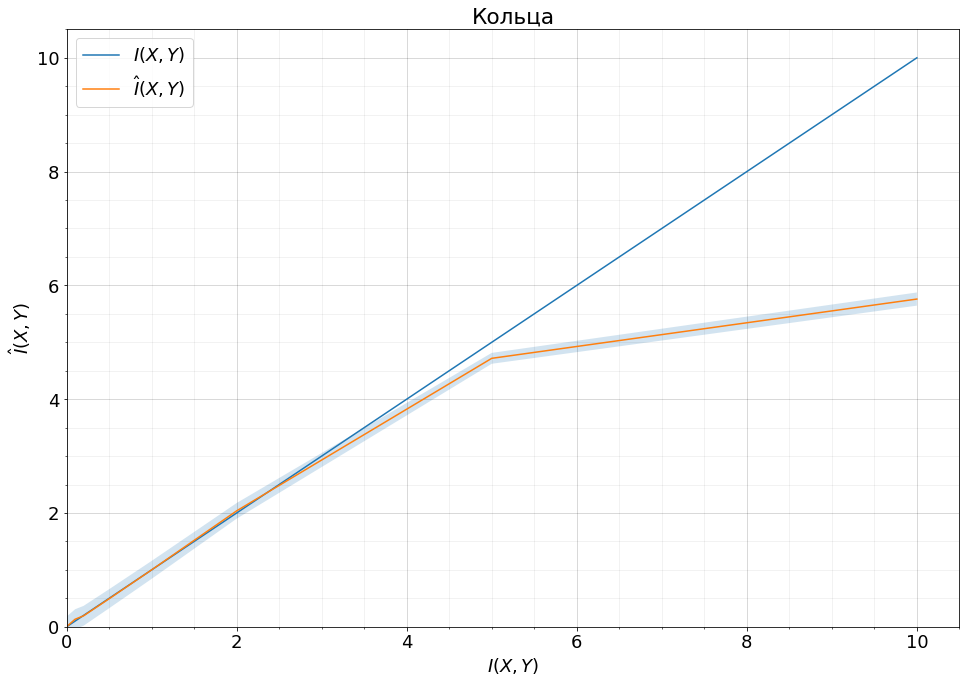

In [19]:
plot_estimated_MI(MI, estimated_MI, "Кольца")

## Зависимость оценки от размерности

In [20]:
def perform_normal_test_dim(mi, n_samples, dimensions, X_map = None, Y_map = None, verbose = 0):
    """
    Вычислить оценки взаимной информации для разных истинных значений.
    """
    n_exps = len(dimensions)
    
    # Оценки взаимной информации.
    estimated_MI = []

    # Проведение тестов.
    for n_exp in range(n_exps):
        estimated_MI.append(perform_normal_test(mi, n_samples, dimensions[n_exp], dimensions[n_exp],
                                                X_map, Y_map, verbose))
        
    return estimated_MI

In [21]:
def plot_estimated_dim(dimensions, mi, estimated_MI, title):
    estimated_MI_mean = np.array([estimated_MI[index][0] for index in range(len(estimated_MI))])
    estimated_MI_std  = np.array([estimated_MI[index][1] for index in range(len(estimated_MI))])
    
    fig_normal, ax_normal = plt.subplots()

    fig_normal.set_figheight(11)
    fig_normal.set_figwidth(16)

    # Сетка.
    ax_normal.grid(color='#000000', alpha=0.15, linestyle='-', linewidth=1, which='major')
    ax_normal.grid(color='#000000', alpha=0.1, linestyle='-', linewidth=0.5, which='minor')

    ax_normal.set_title(title)
    ax_normal.set_xlabel("Размерность $ X $ и $ Y $")
    ax_normal.set_ylabel("$\\hat I(X,Y)$")
    
    ax_normal.minorticks_on()
    
    #ax_normal.set_yscale('log')
    #ax_normal.set_xscale('log')

    ax_normal.plot(dimensions, np.ones_like(dimensions) * mi, label="$I(X,Y)$")
    ax_normal.plot(dimensions, estimated_MI_mean, label="$\\hat I(X,Y)$")
    ax_normal.fill_between(dimensions, estimated_MI_mean + estimated_MI_std, estimated_MI_mean - estimated_MI_std, alpha=0.2)

    ax_normal.legend(loc='upper left')

    ax_normal.set_xlim((0.0, None))
    ax_normal.set_ylim((0.0, None))

    plt.show();

### Глобальные параметры тестов

In [22]:
#dimensions = [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30, 40]
dimensions = [1, 2, 4, 6, 8, 12, 16, 20, 30, 40]
mi = 2.0

### Нормальный случайный вектор

In [23]:
# Оценки взаимной информации.
estimated_MI = perform_normal_test_dim(mi, n_samples, dimensions, verbose=10)

Настройка эстиматора для X
Поиск по сетке:  [0.07903941 0.08958453 0.10153653 0.11508312 0.13043705 0.14783942
 0.16756356]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.14783942 0.17109781 0.19801526 0.22916741 0.26522047 0.30694548
 0.35523474]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.14783942 0.15521785 0.16296452 0.17109781 0.17963703 0.18860242
 0.19801526]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.16296452 0.16563173 0.16834259 0.17109781 0.17389814 0.17674429
 0.17963703]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.16296452 0.16384878 0.16473784 0.16563173 0.16653046 0.16743407
 0.16834259]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.16473784 0.16503527 0.16533323 0.16563173 0.16593076 0.16623034
 0.16653046]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'algorithm': 'auto', 'atol': 0

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 832 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 792 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 757 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Paralle

[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 691 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 764 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 792 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 792 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      |

Настройка эстиматора для X
Поиск по сетке:  [0.19816836 0.22497493 0.25540767 0.28995709 0.32918007 0.37370881
 0.42426103]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.22497493 0.23469332 0.24483152 0.25540767 0.26644068 0.27795029
 0.28995709]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.25540767 0.25903362 0.26271104 0.26644068 0.27022326 0.27405954
 0.27795029]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.26644068 0.26769562 0.26895647 0.27022326 0.27149602 0.27277477
 0.27405954]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'algorithm': 'auto', 'atol': 0, 'bandwidth': 0.27022326121512164, 'breadth_first': True, 'kernel': 'gaussian', 'leaf_size': 40, 'metric': 'euclidean', 'metric_params': None, 'rtol': 0.001}
Настройка эстиматора для Y
Поиск по сетке:  [0.19723463 0.22405735 0.25452781 0.28914206 0.32846365 0.37313274
 0.42387655]
Fitting 5 folds for each of 7 c

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 785 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 792 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 820 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 799 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 785 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.3s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 co

[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 785 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      |

Настройка эстиматора для X
Поиск по сетке:  [0.31155219 0.35484462 0.40415285 0.46031281 0.52427661 0.59712865
 0.680104  ]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.35484462 0.37057322 0.386999   0.40415285 0.42206705 0.44077531
 0.46031281]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.386999   0.39263448 0.39835204 0.40415285 0.41003813 0.41600912
 0.42206705]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.39263448 0.39453116 0.39643699 0.39835204 0.40027633 0.40220992
 0.40415285]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'algorithm': 'auto', 'atol': 0, 'bandwidth': 0.3983520368130656, 'breadth_first': True, 'kernel': 'gaussian', 'leaf_size': 40, 'metric': 'euclidean', 'metric_params': None, 'rtol': 0.001}
Настройка эстиматора для Y
Поиск по сетке:  [0.31044205 0.35393491 0.40352111 0.46005432 0.52450783 0.59799125
 0.68176969]
Fitting 5 folds for each of 7 ca

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 785 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.4s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 785 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.4s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 co

[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 785 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.3s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 691 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.3s
[Paralle

[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      |

Настройка эстиматора для X
Поиск по сетке:  [0.36168727 0.41201378 0.4693429  0.53464901 0.60904206 0.69378643
 0.79032245]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.41201378 0.4302999  0.4493976  0.4693429  0.49017342 0.51192845
 0.53464901]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.4693429  0.47618614 0.48312917 0.49017342 0.49732038 0.50457155
 0.51192845]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.48312917 0.48546593 0.487814   0.49017342 0.49254426 0.49492656
 0.49732038]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'algorithm': 'auto', 'atol': 0, 'bandwidth': 0.48781399724849367, 'breadth_first': True, 'kernel': 'gaussian', 'leaf_size': 40, 'metric': 'euclidean', 'metric_params': None, 'rtol': 0.001}
Настройка эстиматора для Y
Поиск по сетке:  [0.3597873  0.4104256  0.468191   0.5340866  0.60925668 0.69500658
 0.79282536]
Fitting 5 folds for each of 7 c

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 792 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Paralle

[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 684 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 764 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 832 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 865 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.6s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.8s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 co

[Parallel(n_jobs=32)]: Done 691 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 764 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.7s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.9s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      |

Настройка эстиматора для X
Поиск по сетке:  [0.38613668 0.44156017 0.50493877 0.57741432 0.66029253 0.75506652
 0.86344373]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.50493877 0.52802562 0.55216805 0.57741432 0.6038149  0.63142257
 0.66029253]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.52802562 0.53595347 0.54400035 0.55216805 0.56045838 0.56887318
 0.57741432]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.54400035 0.54670941 0.54943195 0.55216805 0.55491778 0.5576812
 0.56045838]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'algorithm': 'auto', 'atol': 0, 'bandwidth': 0.5549177776283557, 'breadth_first': True, 'kernel': 'gaussian', 'leaf_size': 40, 'metric': 'euclidean', 'metric_params': None, 'rtol': 0.001}
Настройка эстиматора для Y
Поиск по сетке:  [0.39122956 0.44598765 0.50840992 0.57956906 0.66068792 0.75316051
 0.85857595]
Fitting 5 folds for each of 7 can

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 785 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.7s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.8s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    2.0s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 co

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 853 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.6s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.7s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    2.0s finish

[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.6s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 684 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 750 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 858 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 co

[Parallel(n_jobs=32)]: Done 677 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 764 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 832 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 865 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      |

Настройка эстиматора для X
Поиск по сетке:  [0.41625178 0.4762853  0.54497711 0.62357593 0.71351059 0.81641599
 0.93416283]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.54497711 0.57000932 0.59619132 0.62357593 0.65221838 0.68217646
 0.71351059]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.62357593 0.63298085 0.64252762 0.65221838 0.6620553  0.67204058
 0.68217646]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.64252762 0.64574177 0.648972   0.65221838 0.65548101 0.65875995
 0.6620553 ]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'algorithm': 'auto', 'atol': 0, 'bandwidth': 0.6522183829235159, 'breadth_first': True, 'kernel': 'gaussian', 'leaf_size': 40, 'metric': 'euclidean', 'metric_params': None, 'rtol': 0.001}
Настройка эстиматора для Y
Поиск по сетке:  [0.41644219 0.47603143 0.54414737 0.62201011 0.71101433 0.81275427
 0.92905231]
Fitting 5 folds for each of 7 ca

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 691 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 764 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.6s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.8s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.6s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.7s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    2.0s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 co

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 691 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.7s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.8s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    2.1s finish

[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 691 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.6s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.7s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.8s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    2.1s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 691 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 750 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 811 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 858 tasks      | elapsed:    1.6s
[Parallel(n_jobs=32)]: Done 886 tasks      | elapsed:    1.7s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.8s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.9s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    2.0s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    2.1s finish

[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 691 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 750 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 804 tasks      | elapsed:    1.6s
[Parallel(n_jobs=32)]: Done 851 tasks      | elapsed:    1.6s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.7s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.8s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.9s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    2.0s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    2.1s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      |

Настройка эстиматора для X
Поиск по сетке:  [0.42974928 0.49312808 0.56585389 0.64930521 0.7450638  0.85494473
 0.98103074]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.64930521 0.67977274 0.71166991 0.7450638  0.78002464 0.81662596
 0.85494473]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.71166991 0.7226315  0.73376193 0.7450638  0.75653974 0.76819245
 0.78002464]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.7226315  0.72632276 0.73003287 0.73376193 0.73751004 0.7412773
 0.7450638 ]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.72632276 0.72755736 0.72879406 0.73003287 0.73127378 0.7325168
 0.73376193]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'algorithm': 'auto', 'atol': 0, 'bandwidth': 0.7300328673594761, 'breadth_first': True, 'kernel': 'gaussian', 'leaf_size': 40, 'metric': 'euclidean', 'metric_params': None, 'rtol': 0.001}
Н

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 663 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 729 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 783 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 865 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 757 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 804 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 844 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 886 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.6s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 750 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 818 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.6s
[Paralle

[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 750 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 811 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 865 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.7s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 677 tasks      | elapsed:    1.8s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    1.9s
[Parallel(n_jobs=32)]: Done 797 tasks      | elapsed:    1.9s
[Parallel(n_jobs=32)]: Done 837 tasks      | elapsed:    2.0s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    2.1s
[Parallel(n_jobs=32)]: Done 907 tasks      | elapsed:    2.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    2.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    2.4s
[Paralle

[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    1.6s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    1.8s
[Parallel(n_jobs=32)]: Done 757 tasks      | elapsed:    1.9s
[Parallel(n_jobs=32)]: Done 804 tasks      | elapsed:    1.9s
[Parallel(n_jobs=32)]: Done 823 tasks      | elapsed:    2.0s
[Parallel(n_jobs=32)]: Done 872 tasks      | elapsed:    2.1s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    2.2s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    2.3s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    2.4s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      |

Настройка эстиматора для X
Поиск по сетке:  [0.43638712 0.50145442 0.57622356 0.66214112 0.76086938 0.87431847
 1.00468333]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.66214112 0.69353823 0.72642412 0.76086938 0.79694794 0.83473727
 0.87431847]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.76086938 0.77271034 0.78473557 0.79694794 0.80935037 0.82194581
 0.83473727]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.77271034 0.77669813 0.78070651 0.78473557 0.78878542 0.79285618
 0.79694794]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.77669813 0.77803197 0.77936809 0.78070651 0.78204722 0.78339024
 0.78473557]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'algorithm': 'auto', 'atol': 0, 'bandwidth': 0.7820472244660422, 'breadth_first': True, 'kernel': 'gaussian', 'leaf_size': 40, 'metric': 'euclidean', 'metric_params': None, 'rtol': 0.001}

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 691 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 832 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 865 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 886 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 691 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 750 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 811 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 858 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 886 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.6s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.7s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.5s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 712 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 778 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 858 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.6s
[Paralle

[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 691 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 764 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 858 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 893 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 914 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    1.6s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    1.7s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  58 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    1.8s
[Parallel(n_jobs=32)]: Done 691 tasks      | elapsed:    2.0s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    2.0s
[Parallel(n_jobs=32)]: Done 832 tasks      | elapsed:    2.1s
[Parallel(n_jobs=32)]: Done 858 tasks      | elapsed:    2.2s
[Parallel(n_jobs=32)]: Done 879 tasks      | elapsed:    2.2s
[Parallel(n_jobs=32)]: Done 900 tasks      | elapsed:    2.3s
[Parallel(n_jobs=32)]: Done 930 tasks      | elapsed:    2.4s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    2.5s
[Paralle

[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 628 tasks      | elapsed:    1.6s
[Parallel(n_jobs=32)]: Done 701 tasks      | elapsed:    1.7s
[Parallel(n_jobs=32)]: Done 776 tasks      | elapsed:    1.8s
[Parallel(n_jobs=32)]: Done 823 tasks      | elapsed:    1.8s
[Parallel(n_jobs=32)]: Done 865 tasks      | elapsed:    1.9s
[Parallel(n_jobs=32)]: Done 907 tasks      | elapsed:    2.0s
[Parallel(n_jobs=32)]: Done 930 tasks      | elapsed:    2.0s
[Parallel(n_jobs=32)]: Done 953 tasks      | elapsed:    2.1s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      |

Настройка эстиматора для X
Поиск по сетке:  [0.4469758  0.5157378  0.59507803 0.68662382 0.79225287 0.9141317
 1.05476018]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.79225287 0.83095748 0.87155297 0.9141317  0.95879057 1.0056312
 1.05476018]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.83095748 0.84427474 0.85780543 0.87155297 0.88552083 0.89971255
 0.9141317 ]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.85780543 0.86236368 0.86694615 0.87155297 0.87618427 0.88084018
 0.88552083]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.87155297 0.87309401 0.87463778 0.87618427 0.8777335  0.87928547
 0.88084018]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'algorithm': 'auto', 'atol': 0, 'bandwidth': 0.877733499786944, 'breadth_first': True, 'kernel': 'gaussian', 'leaf_size': 40, 'metric': 'euclidean', 'metric_params': None, 'rtol': 0.001}
На

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 684 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 764 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 832 tasks      | elapsed:    1.6s
[Parallel(n_jobs=32)]: Done 858 tasks      | elapsed:    1.6s
[Parallel(n_jobs=32)]: Done 886 tasks      | elapsed:    1.7s
[Parallel(n_jobs=32)]: Done 907 tasks      | elapsed:    1.8s
[Parallel(n_jobs=32)]: Done 930 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    1.6s
[Parallel(n_jobs=32)]: Done 750 tasks      | elapsed:    1.6s
[Parallel(n_jobs=32)]: Done 818 tasks      | elapsed:    1.7s
[Parallel(n_jobs=32)]: Done 865 tasks      | elapsed:    1.7s
[Parallel(n_jobs=32)]: Done 886 tasks      | elapsed:    1.8s
[Parallel(n_jobs=32)]: Done 907 tasks      | elapsed:    1.9s
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:    2.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    2.1s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    2.2s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    1.2s
[Parallel(n_jobs=32)]: Done 698 tasks      | elapsed:    1.6s
[Parallel(n_jobs=32)]: Done 757 tasks      | elapsed:    1.6s
[Parallel(n_jobs=32)]: Done 825 tasks      | elapsed:    1.7s
[Parallel(n_jobs=32)]: Done 865 tasks      | elapsed:    1.7s
[Parallel(n_jobs=32)]: Done 886 tasks      | elapsed:    1.8s
[Parallel(n_jobs=32)]: Done 907 tasks      | elapsed:    1.9s
[Parallel(n_jobs=32)]: Done 930 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.6s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 691 tasks      | elapsed:    1.6s
[Parallel(n_jobs=32)]: Done 785 tasks      | elapsed:    1.6s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    1.7s
[Parallel(n_jobs=32)]: Done 858 tasks      | elapsed:    1.8s
[Parallel(n_jobs=32)]: Done 879 tasks      | elapsed:    1.8s
[Parallel(n_jobs=32)]: Done 907 tasks      | elapsed:    1.9s
[Parallel(n_jobs=32)]: Done 930 tasks      | elapsed:    2.0s
[Parallel(n_jobs=32)]: Done 960 tasks      | elapsed:    2.1s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    2.2s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 co

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    1.8s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    2.0s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    2.0s
[Parallel(n_jobs=32)]: Done 663 tasks      | elapsed:    2.8s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    2.9s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    2.9s
[Parallel(n_jobs=32)]: Done 865 tasks      | elapsed:    3.0s
[Parallel(n_jobs=32)]: Done 886 tasks      | elapsed:    3.1s
[Parallel(n_jobs=32)]: Done 907 tasks      | elapsed:    3.2s
[Parallel(n_jobs=32)]: Done 930 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    1.0s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    1.7s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    1.9s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    2.1s
[Parallel(n_jobs=32)]: Done 649 tasks      | elapsed:    2.6s
[Parallel(n_jobs=32)]: Done 743 tasks      | elapsed:    2.7s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    2.8s
[Parallel(n_jobs=32)]: Done 865 tasks      | elapsed:    2.9s
[Parallel(n_jobs=32)]: Done 886 tasks      | elapsed:    3.0s
[Parallel(n_jobs=32)]: Done 907 tasks      | elapsed:    3.0s
[Parallel(n_jobs=32)]: Done 930 tasks      | elapsed:    3.1s
[Parallel(n_jobs=32)]: Done 953 tasks      | elapsed:    3.2s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    3.6s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

Настройка эстиматора для X
Поиск по сетке:  [0.44829628 0.51862173 0.59997932 0.69409971 0.802985   0.92895144
 1.07467856]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.802985   0.84295158 0.88490738 0.92895144 0.97518767 1.0237252
 1.07467856]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.88490738 0.89935168 0.91403175 0.92895144 0.94411466 0.95952539
 0.97518767]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.91403175 0.91897816 0.92395134 0.92895144 0.93397859 0.93903295
 0.94411466]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Поиск по сетке:  [0.92895144 0.93062414 0.93229986 0.93397859 0.93566035 0.93734513
 0.93903295]
Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'algorithm': 'auto', 'atol': 0, 'bandwidth': 0.9306241400541545, 'breadth_first': True, 'kernel': 'gaussian', 'leaf_size': 40, 'metric': 'euclidean', 'metric_params': None, 'rtol': 0.001}


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    1.8s
[Parallel(n_jobs=32)]: Done 684 tasks      | elapsed:    2.0s
[Parallel(n_jobs=32)]: Done 764 tasks      | elapsed:    2.0s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    2.1s
[Parallel(n_jobs=32)]: Done 858 tasks      | elapsed:    2.1s
[Parallel(n_jobs=32)]: Done 879 tasks      | elapsed:    2.2s
[Parallel(n_jobs=32)]: Done 900 tasks      | elapsed:    2.3s
[Parallel(n_jobs=32)]: Done 930 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.9s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 656 tasks      | elapsed:    1.9s
[Parallel(n_jobs=32)]: Done 750 tasks      | elapsed:    2.0s
[Parallel(n_jobs=32)]: Done 825 tasks      | elapsed:    2.0s
[Parallel(n_jobs=32)]: Done 865 tasks      | elapsed:    2.1s
[Parallel(n_jobs=32)]: Done 886 tasks      | elapsed:    2.2s
[Parallel(n_jobs=32)]: Done 907 tasks      | elapsed:    2.3s
[Parallel(n_jobs=32)]: Done 930 tasks      | elapsed:    2.3s
[Parallel(n_jobs=32)]: Done 953 tasks      | elapsed:    2.4s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    2.6s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    1.6s
[Parallel(n_jobs=32)]: Done 677 tasks      | elapsed:    1.9s
[Parallel(n_jobs=32)]: Done 771 tasks      | elapsed:    2.0s
[Parallel(n_jobs=32)]: Done 818 tasks      | elapsed:    2.0s
[Parallel(n_jobs=32)]: Done 858 tasks      | elapsed:    2.1s
[Parallel(n_jobs=32)]: Done 886 tasks      | elapsed:    2.2s
[Parallel(n_jobs=32)]: Done 907 tasks      | elapsed:    2.2s
[Parallel(n_jobs=32)]: Done 930 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    0.8s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    1.3s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    1.7s
[Parallel(n_jobs=32)]: Done 670 tasks      | elapsed:    1.9s
[Parallel(n_jobs=32)]: Done 757 tasks      | elapsed:    2.0s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    2.0s
[Parallel(n_jobs=32)]: Done 858 tasks      | elapsed:    2.1s
[Parallel(n_jobs=32)]: Done 879 tasks      | elapsed:    2.2s
[Parallel(n_jobs=32)]: Done 907 tasks      | elapsed:    2.2s
[Parallel(n_jobs=32)]: Done 930 tasks      | elapsed:    2.3s
[Parallel(n_jobs=32)]: Done 953 tasks      | elapsed:    2.4s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

Восстановлено блоков данных: 0


[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done  36 tasks      | elapsed:    0.3s
[Parallel(n_jobs=32)]: Done  58 tasks      | elapsed:    0.4s
[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    2.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    2.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    2.9s
[Parallel(n_jobs=32)]: Done 635 tasks      | elapsed:    3.5s
[Parallel(n_jobs=32)]: Done 736 tasks      | elapsed:    3.6s
[Parallel(n_jobs=32)]: Done 846 tasks      | elapsed:    3.7s
[Parallel(n_jobs=32)]: Done 865 tasks      | elapsed:    3.8s
[Parallel(n_jobs=32)]: Done 886 tasks      | elapsed:    3.9s
[Parallel(n_jobs=32)]: Done 907 tasks      | elapsed:    4.0s
[Parallel(n_jobs=32)]: Done 930 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 128 tasks      | elapsed:    1.4s
[Parallel(n_jobs=32)]: Done 232 tasks      | elapsed:    1.5s
[Parallel(n_jobs=32)]: Done 336 tasks      | elapsed:    2.4s
[Parallel(n_jobs=32)]: Done 456 tasks      | elapsed:    2.6s
[Parallel(n_jobs=32)]: Done 576 tasks      | elapsed:    3.1s
[Parallel(n_jobs=32)]: Done 684 tasks      | elapsed:    3.7s
[Parallel(n_jobs=32)]: Done 799 tasks      | elapsed:    3.7s
[Parallel(n_jobs=32)]: Done 839 tasks      | elapsed:    3.9s
[Parallel(n_jobs=32)]: Done 865 tasks      | elapsed:    3.9s
[Parallel(n_jobs=32)]: Done 886 tasks      | elapsed:    4.0s
[Parallel(n_jobs=32)]: Done 907 tasks      | elapsed:    4.1s
[Parallel(n_jobs=32)]: Done 930 tasks      | elapsed:    4.2s
[Parallel(n_jobs=32)]: Done 953 tasks      | elapsed:    4.4s
[Parallel(n_jobs=32)]: Done 1000 out of 1000 | elapsed:    4.8s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  18 tasks      |

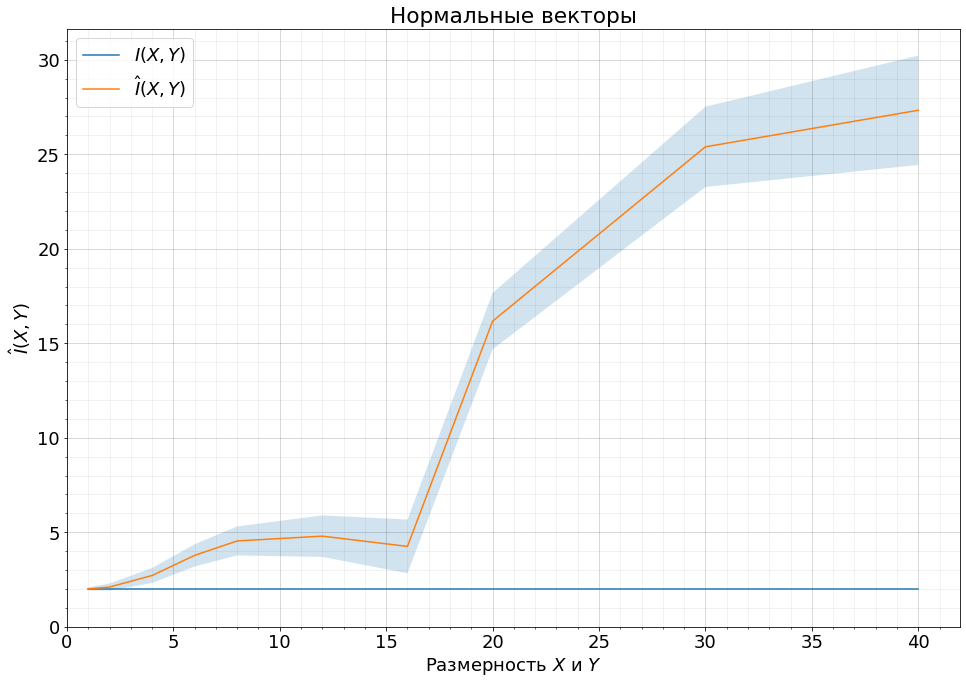

In [24]:
plot_estimated_dim(dimensions, mi, estimated_MI, "Нормальные векторы")